<a href="https://colab.research.google.com/github/Pathway2008/article_summary/blob/main/Kobart_base_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rouge_score
!pip install datasets
!pip install pytorch_lightning
!pip install transformers
!pip install konlpy

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=6cc1c7c3c8ccd1d9214a5633361c820dfcfd5d6947ef1a2951920e5ed66709c7
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that 

In [42]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/article_summary/article_train.csv')
test = pd.read_csv('/content/drive/MyDrive/article_summary/article_valid.csv')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10800 non-null  object
 1   article_name    10800 non-null  object
 2   author          10800 non-null  object
 3   publisher       10800 non-null  object
 4   publisher_year  10800 non-null  int64 
 5   article         10800 non-null  object
 6   summary         10800 non-null  object
dtypes: int64(1), object(6)
memory usage: 590.8+ KB


In [ ]:
art_0124["summary_pred"] = art_0124["article"].apply(lambda x: summarize_article(x, model, tokenizer))

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   object
 1   article_name    1350 non-null   object
 2   author          1350 non-null   object
 3   publisher       1350 non-null   object
 4   publisher_year  1350 non-null   int64 
 5   article         1350 non-null   object
 6   summary         1350 non-null   object
dtypes: int64(1), object(6)
memory usage: 74.0+ KB


In [ ]:
# test_t = test[:10]
# test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10 non-null     object
 1   article_name    10 non-null     object
 2   author          10 non-null     object
 3   publisher       10 non-null     object
 4   publisher_year  10 non-null     int64 
 5   article         10 non-null     object
 6   summary         10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


In [14]:
import torch
from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

# 🔹 저장된 모델 & 토크나이저 로드
load_path = "/content/drive/MyDrive/article_summary/final_model"
tokenizer = PreTrainedTokenizerFast.from_pretrained(load_path)
model = BartForConditionalGeneration.from_pretrained(load_path).to("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 기사 요약 함수
def summarize_article(article, model, tokenizer, max_length=128):
    inputs = tokenizer(article, return_tensors="pt", truncation=True, padding="max_length", max_length=512).to(model.device)

    with torch.no_grad():
        summary_ids = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=5,  # 🔥 빔서치 적용 (더 나은 요약 생성)
            length_penalty=1.0,  # 🔥 길이 조정
            early_stopping=True
        )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 🔹 DataFrame에 요약문 추가
art_0124["summary_pred"] = art_0124["article"].apply(lambda x: summarize_article(x, model, tokenizer))

# 🔹 결과 확인


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


KeyError: "['summary'] not in index"

In [15]:
art_0124[["article",'summary_pred']].head(2)

,article,summary_pred
0,<신규> ▲개인영업본부 부사장 박명신 ▲리스크관리본부 전무 우경원 ▲소비자보호본부 ...,상품/브랜드본부兼경영지원본부 전무 이인복 ▲마케팅본부 겸경영지원본부 전무 이인복 ▲...
1,국내 최대 종합보증사인 서울보증보험이 24일 금융위원회에 증권신고서를 제출하고 유가...,국내 최대 종합보증사인 서울보증보험이 24일 금융위원회에 증권신고서를 제출하고 유가...


# 기사추출

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt  # 한국어 형태소 분석기
import matplotlib.font_manager as fm


a1 = pd.read_csv('/content/drive/MyDrive/article_summary/article/asiae.csv')
a2 = pd.read_csv('/content/drive/MyDrive/article_summary/article/chosun.csv')
a3 = pd.read_csv('/content/drive/MyDrive/article_summary/article/donga.csv')
a4 = pd.read_csv('/content/drive/MyDrive/article_summary/article/hani.csv')
a5 = pd.read_csv('/content/drive/MyDrive/article_summary/article/hankyung.csv')
a6 = pd.read_csv('/content/drive/MyDrive/article_summary/article/heraldcorp.csv')
a7 = pd.read_csv('/content/drive/MyDrive/article_summary/article/joongang.csv')
a8 = pd.read_csv('/content/drive/MyDrive/article_summary/article/mk.csv')

In [9]:
article = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8],axis=0).reset_index(drop=True)

In [12]:
 article['date'] = pd.to_datetime(article['date'], format="mixed")
 article = article.dropna(subset=['article'])
 art_0124 = article[(article['date'] == '2025.01.24')].reset_index(drop=True)

In [13]:
art_0124.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   article_name  403 non-null    object        
 1   journalist    316 non-null    object        
 2   publisher     403 non-null    object        
 3   date          403 non-null    datetime64[ns]
 4   article       403 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 15.9+ KB


In [4]:
import matplotlib.font_manager as fm
!apt-get -qq install fonts-nanum
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


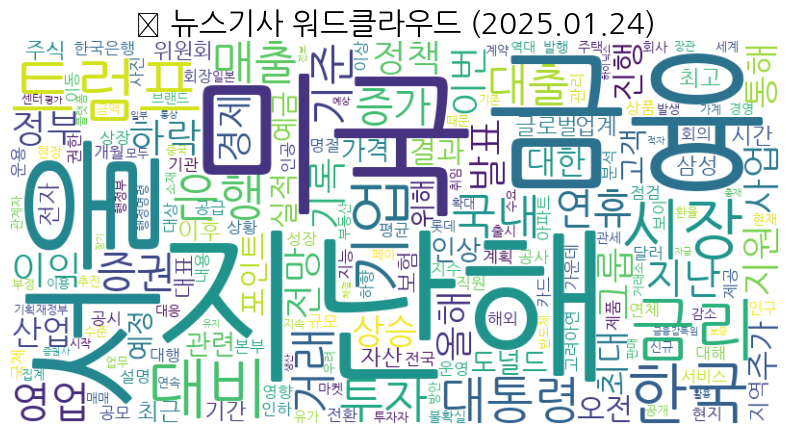

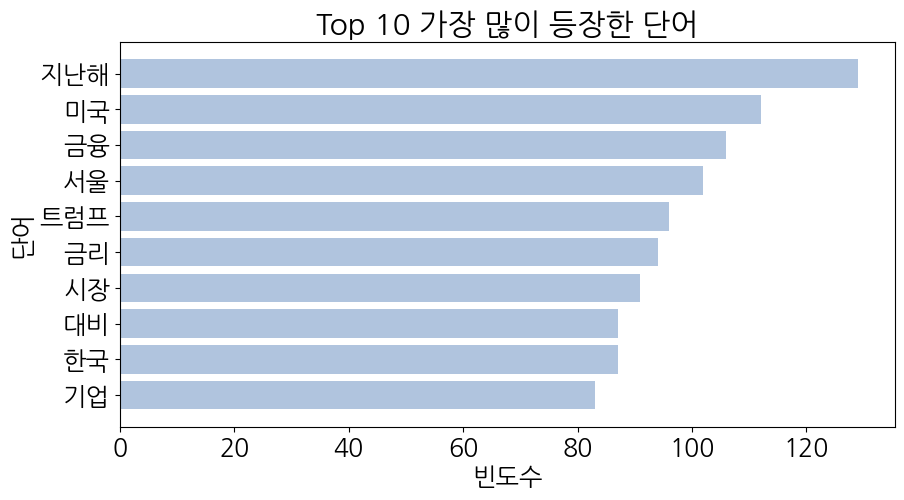

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt  # 한국어 형태소 분석기
import matplotlib.font_manager as fm

# ✅ 1️⃣ Colab 환경에 한글 폰트 설치 (한 번만 실행)
!apt-get -qq install fonts-nanum
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # Linux/Colab 폰트 경로 설정

# ✅ 2️⃣ Matplotlib에 한글 폰트 적용
fe = fm.FontEntry(fname=font_path, name="NanumGothic")
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({"font.size": 18, "font.family": "NanumGothic"})  # 폰트 설정

# ✅ 3️⃣ 날짜 필터링 (2025.01.24)
# df = a[a["date"] == "2025.01.24"]

# ✅ 4️⃣ 'article' 컬럼 병합
text_data = " ".join(art_0124["summary_pred"].dropna())

# ✅ 5️⃣ 형태소 분석 및 명사 추출
okt = Okt()
words = okt.nouns(text_data)  # 명사만 추출

# ✅ 6️⃣ 불용어 제거
stopwords = {"기자", "이", "것", "있다", "하다", "등", "및", "그", "수"}#'지난해','기업','투자','대비','시장','트럼프','미국'
words = [word for word in words if word not in stopwords and len(word) > 1]

# ✅ 7️⃣ 단어 빈도수 계산
word_counts = Counter(words)
top10_words = word_counts.most_common(10)

# ✅ 8️⃣ 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 🚀 Linux/Colab 환경 폰트 경로 사용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("📰 뉴스기사 워드클라우드 (2025.01.24)")
plt.show()

# ✅ 9️⃣ Top 10 단어 시각화
top_words, top_counts = zip(*top10_words)
plt.figure(figsize=(10, 5))
plt.barh(top_words[::-1], top_counts[::-1], color="lightsteelblue")
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.title("Top 10 가장 많이 등장한 단어")
plt.show()

In [18]:
from collections import Counter
import pandas as pd

# 각 기사에서 단어 등장 횟수 계산
def count_keywords_in_article(article, keywords):
    word_count = Counter(article.split())  # 공백을 기준으로 단어를 분리하여 카운트
    return sum(word_count[key] for key in keywords)

# 각 기사의 점수를 계산하고 점수가 높은 상위 3개의 기사 추출
art_0124['summary_score'] = art_0124['summary_pred'].apply(lambda x: count_keywords_in_article(x, top_words))

# 점수가 높은 상위 3개의 기사 추출
# top_articles = art_0124.sort_values(by='score', ascending=False).head(5)

In [28]:
# ✅ 4️⃣ 'article' 컬럼 병합
text_data = " ".join(art_0124["article_name"].dropna())

# ✅ 5️⃣ 형태소 분석 및 명사 추출
okt = Okt()
words = okt.nouns(text_data)  # 명사만 추출

# ✅ 6️⃣ 불용어 제거
stopwords = {"기자", "이", "것", "있다", "하다", "등", "및", "그", "수"}#'지난해','기업','투자','대비','시장','트럼프','미국'
words = [word for word in words if word not in stopwords and len(word) > 1]

# ✅ 7️⃣ 단어 빈도수 계산
word_counts = Counter(words)
top10_words = word_counts.most_common(10)

# ✅ 8️⃣ 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 🚀 Linux/Colab 환경 폰트 경로 사용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_counts)

In [29]:
from collections import Counter
import pandas as pd

# 각 기사에서 단어 등장 횟수 계산
def count_keywords_in_article(article, keywords):
    word_count = Counter(article.split())  # 공백을 기준으로 단어를 분리하여 카운트
    return sum(word_count[key] for key in keywords)

# 각 기사의 점수를 계산하고 점수가 높은 상위 3개의 기사 추출
art_0124['name_score'] = art_0124['article_name'].apply(lambda x: count_keywords_in_article(x, top_words))

# 점수가 높은 상위 3개의 기사 추출
# top_articles = art_0124.sort_values(by='score', ascending=False).head(5)

In [30]:
# ✅ 4️⃣ 'article' 컬럼 병합
text_data = " ".join(art_0124["article"].dropna())

# ✅ 5️⃣ 형태소 분석 및 명사 추출
okt = Okt()
words = okt.nouns(text_data)  # 명사만 추출

# ✅ 6️⃣ 불용어 제거
stopwords = {"기자", "이", "것", "있다", "하다", "등", "및", "그", "수"}#'지난해','기업','투자','대비','시장','트럼프','미국'
words = [word for word in words if word not in stopwords and len(word) > 1]

# ✅ 7️⃣ 단어 빈도수 계산
word_counts = Counter(words)
top10_words = word_counts.most_common(10)

# ✅ 8️⃣ 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,  # 🚀 Linux/Colab 환경 폰트 경로 사용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_counts)

In [31]:
from collections import Counter
import pandas as pd

# 각 기사에서 단어 등장 횟수 계산
def count_keywords_in_article(article, keywords):
    word_count = Counter(article.split())  # 공백을 기준으로 단어를 분리하여 카운트
    return sum(word_count[key] for key in keywords)

# 각 기사의 점수를 계산하고 점수가 높은 상위 3개의 기사 추출
art_0124['article_score'] = art_0124['article'].apply(lambda x: count_keywords_in_article(x, top_words))

# 점수가 높은 상위 3개의 기사 추출
# top_articles = art_0124.sort_values(by='score', ascending=False).head(5)

In [34]:
art_0124['total_score'] = art_0124['summary_score'] + art_0124['name_score'] + art_0124['article_score']

In [35]:
top_articles = art_0124.sort_values(by='total_score', ascending=False).head(5)
display(top_articles[['summary_pred', 'total_score']])
display(top_articles['summary_pred'].iloc[0])

,summary_pred,total_score
373,도널드 트럼프 미국 대통령의 ‘코인 사랑’이 향후 시장에 어떤 영향을 미칠지 투자자...,41
328,트럼프 대통령은 트럼프 미국 대통령이 기준금리 인하를 요구했다. 1기 트럼프 행정부...,35
281,그는 ‘도널드 트럼프 미국 신 정부는 한국과의 무역 적자문제를 최우선 순위에 둘 것...,34
312,도널드 트럼프 미국 대통령 취임식을 계기로 트럼프 2기 행정부 안팎에 포진한 국내 ...,33
181,동시에 '트럼프 일가'의 밈코인과 암호화폐 프로젝트가 시장의 큰 주목을 받고 있다....,31


'도널드 트럼프 미국 대통령의 ‘코인 사랑’이 향후 시장에 어떤 영향을 미칠지 투자자들이 촉각을 곤두세우고 있다. 트럼프 2.0 기간에 그가 다수의 파격적인 정책을 수행할 것을 예고했기 때문이다. 투자자들의 기대와는 달리 트럼프 대통령은 취임 첫날 행정명령에 비트코인, 가상자산 관련 내용을 포함하지 않았다. 하지만 코인 전문가들은 실망할 필요가 없다고 강조했다.'

In [36]:
display(top_articles['summary_pred'].iloc[0],'\n')
display(top_articles['summary_pred'].iloc[1],'\n')
display(top_articles['summary_pred'].iloc[2],'\n')
display(top_articles['summary_pred'].iloc[3],'\n')
display(top_articles['summary_pred'].iloc[4],'\n')

'도널드 트럼프 미국 대통령의 ‘코인 사랑’이 향후 시장에 어떤 영향을 미칠지 투자자들이 촉각을 곤두세우고 있다. 트럼프 2.0 기간에 그가 다수의 파격적인 정책을 수행할 것을 예고했기 때문이다. 투자자들의 기대와는 달리 트럼프 대통령은 취임 첫날 행정명령에 비트코인, 가상자산 관련 내용을 포함하지 않았다. 하지만 코인 전문가들은 실망할 필요가 없다고 강조했다.'

'\n'

'트럼프 대통령은 트럼프 미국 대통령이 기준금리 인하를 요구했다. 1기 트럼프 행정부 때와 마찬가지로 제롬 파월 연방준비제도(Fed) 의장을 향한 압박을 시작했다 트럼프 대통령은 23일(현지시간) 스위스 다보스 세계경제포럼에 화상으로 참석해 유가가 하락할 경우 “금리를 즉시 인하할 것을 요구하겠다”고 밝혔다. 이후 백악관에서 개최한 행정명령 서명식에서도 그는 파월 의장과 대화를 하겠냐는 질문에 “적절한 시기에 그렇게 하겠다”고 답했다.'

'\n'

'그는 ‘도널드 트럼프 미국 신 정부는 한국과의 무역 적자문제를 최우선 순위에 둘 것이다. 한국이 대미 흑자를 줄이는 방안을 심각하게 고려하지 않으면 미국은 한미자유무역협정(FTA) 개정 협상에서 미국 정부 조달시장 진출관련 챕터 삭제를 검토할 가능성이 있다. 그는 ‘도널드 트럼프 1기 행정부’에서 2017~2018년 한미FTA 개정협상 당시 미국 측 수석대표를 맡았었다.'

'\n'

'도널드 트럼프 미국 대통령 취임식을 계기로 트럼프 2기 행정부 안팎에 포진한 국내 재계 인사들의 인맥도 그 면면을 드러냈다. 비상계엄 여파로 정부 차원의 공식적인 대미(對美) 창구가 사실상 작동하지 않는 상황에서 어떤 역할을 할지 주목된다. 24일 재계에 따르면 이번 ‘취임식 외교’에서 가장 돋보인 인사는 정용진 신세계그룹 회장이다. 정 회장이 보유한 트럼프 인맥의 출발점은 트럼프 대통령의 장남이자 2기 행정부 실세로 언급되는 트럼프 주니어다.'

'\n'

"동시에 '트럼프 일가'의 밈코인과 암호화폐 프로젝트가 시장의 큰 주목을 받고 있다. 시장 전문가들은 암호화폐 시장에서 전반적인 매도 압력이 감소한 가운데, 조만간 큰 변동성이 나타날 가능성이 있다며 투자자의 주의를 당부했다. 최근 비트코인 대장주 이더리움(ETH) 시세는 24일 16시 8분 바이낸스 USDT 마켓 기준 전일 대비 5.84% 오른 3399달러(업비트 기준 506만5000원)에 거래되고 있다."

'\n'

# 추출 개선

In [41]:
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ 1. TF-IDF 벡터라이저 생성 (기사 제목, 본문, 요약을 모두 고려)
vectorizer = TfidfVectorizer(vocabulary=top_words)
tfidf_matrix = vectorizer.fit_transform(art_0124['article'] + " " + art_0124['article_name'] + " " + art_0124['summary_pred'])

# ✅ 2. TF-IDF 기반 키워드 중요도 계산 함수
def count_tfidf_keywords(text, vectorizer):
    tfidf_values = vectorizer.transform([text]).toarray()[0]  # 해당 문서의 TF-IDF 값 추출
    return sum(tfidf_values)  # 모든 키워드의 TF-IDF 합산

# ✅ 3. 각 점수 계산
art_0124['summary_score'] = art_0124['summary_pred'].apply(lambda x: count_tfidf_keywords(x, vectorizer))
art_0124['name_score'] = art_0124['article_name'].apply(lambda x: count_tfidf_keywords(x, vectorizer))
art_0124['article_score_raw'] = art_0124['article'].apply(lambda x: count_tfidf_keywords(x, vectorizer))  # 기사 본문 포함

# 🔥 4. 기사 원문의 점수를 길이로 정규화
art_0124['article_score_raw'] = art_0124['article'].apply(lambda x: count_tfidf_keywords(x, vectorizer))
art_0124['article_length'] = art_0124['article'].str.len()  # 기사 길이 계산
art_0124['article_score'] = art_0124['article_score_raw'] / art_0124['article_length']  # 정규화

# ✅ 5. 가중치 적용 (필요에 따라 조정 가능)
name_weight = 0.6
article_weight = 1.0
summary_weight = 0.8

art_0124['total_score'] = (
    name_weight * art_0124['name_score'] +
    article_weight * art_0124['article_score'] +
    summary_weight * art_0124['summary_score']
)

# ✅ 6. 상위 5개 기사 추출
top_articles = art_0124.sort_values(by='total_score', ascending=False).head(5)

# ✅ 7. 결과 출력
display(top_articles[['summary_pred', 'total_score']])
display(top_articles['summary_pred'].iloc[0])

,summary_pred,total_score
227,"SK하이닉스의 실적 발표가 열기를 가라앉혔죠. AI 관련 실적은 좋았지만, 그 외 ...",2.223267
402,도널드 트럼프 미국 대통령은 23일(현지시간) 미국 중앙은행인 연방준비제도(Fed)...,2.202052
63,한국 주요 기업들의 로비 금액이 지난해 역대 최고 수준으로 커진 것으로 나타났다. ...,2.169583
181,동시에 '트럼프 일가'의 밈코인과 암호화폐 프로젝트가 시장의 큰 주목을 받고 있다....,1.981443
391,지난해 국내 인구 이동이 4년 만에 증가세로 돌아섰다. 주택 매매량이 10% 이상 ...,1.967526


"SK하이닉스의 실적 발표가 열기를 가라앉혔죠. AI 관련 실적은 좋았지만, 그 외 다른 수요는 회복되지 않고 있다며 올해 설비투자 기대치를 낮춘 탓입니다. 하락하던 장기 금리도 어제부터 다시 상승세로 전환했습니다. 그러나 도널드 트럼프 미국 대통령의 몇 마디 발언이 시장을 구원했습니다. 다보스포럼 연설에서 '금리, 유가, 세금을 낮추겠다'라고 밝힌 게 투자심리를 자극했습니다."

In [38]:
display(top_articles['summary_pred'].iloc[0],'\n')
display(top_articles['summary_pred'].iloc[1],'\n')
display(top_articles['summary_pred'].iloc[2],'\n')
display(top_articles['summary_pred'].iloc[3],'\n')
display(top_articles['summary_pred'].iloc[4])

"SK하이닉스의 실적 발표가 열기를 가라앉혔죠. AI 관련 실적은 좋았지만, 그 외 다른 수요는 회복되지 않고 있다며 올해 설비투자 기대치를 낮춘 탓입니다. 하락하던 장기 금리도 어제부터 다시 상승세로 전환했습니다. 그러나 도널드 트럼프 미국 대통령의 몇 마디 발언이 시장을 구원했습니다. 다보스포럼 연설에서 '금리, 유가, 세금을 낮추겠다'라고 밝힌 게 투자심리를 자극했습니다."

'\n'

'도널드 트럼프 미국 대통령은 23일(현지시간) 미국 중앙은행인 연방준비제도(Fed)의 제롬 파월 의장을 만나 금리 인하를 요구하겠다고 밝혔다. 트럼프 대통령은 이날 백악관 집무실에서 개최한 행정명령 서명식에서 금리를 낮추기 위해 파월 의장과 대화하겠느냐는 질문에 “적절한 시기에 그렇게 하겠다”고 답했다. 그러면서 중국, 멕시코, 캐나다에 대한 관세는 모두 2월 1일부터 부과할 계획이라고 재차 확인했다.'

'\n'

'한국 주요 기업들의 로비 금액이 지난해 역대 최고 수준으로 커진 것으로 나타났다. 인플레이션 감축법(IRA)이나 칩스법 등 미·중 갈등 속 공급망 재편에 따라 현지 투자를 강화하고, 새 정부 출범에 대응하는 차원에서 로비 규모가 커졌다는 분석이다. 23일 미국 상원에 접수된 기업별 로비 내용을 보면, 삼성그룹은 2024년 698만달러(약 100억3000만원)를 로비에 쓴 것으로 나타났다.'

'\n'

"동시에 '트럼프 일가'의 밈코인과 암호화폐 프로젝트가 시장의 큰 주목을 받고 있다. 시장 전문가들은 암호화폐 시장에서 전반적인 매도 압력이 감소한 가운데, 조만간 큰 변동성이 나타날 가능성이 있다며 투자자의 주의를 당부했다. 최근 비트코인 대장주 이더리움(ETH) 시세는 24일 16시 8분 바이낸스 USDT 마켓 기준 전일 대비 5.84% 오른 3399달러(업비트 기준 506만5000원)에 거래되고 있다."

'\n'

'지난해 국내 인구 이동이 4년 만에 증가세로 돌아섰다. 주택 매매량이 10% 이상 늘어나면서 부동산 시장이 활기를 되찾았기 때문으로 분석된다. 서울 집값이 치솟으면서 서울을 벗어난 10명 중 6명은 경기도로 이주한 것으로 나타났다. 24일 통계청이 발표한 ‘2024년 국내 인구 이동통계 결과’에 따르면 지난해 국내 이동자 수는 628만 3000명으로 전년 대비 2.5%(15만 5000명) 증가했다.'